<a href="https://colab.research.google.com/github/ACobo98/DataAnalysis_MachineLearning/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
## High-dimensional data


*   Scientfic data (images, time series, simulations) often lives in very **high-dimensional spaces**. For example:


* * A 100x100 pixels image -> 10K dimensions (one per pixel).
* * A simulation with 1K particules in 3D -> 3K dimensions.
*   "Dimension" means the number of variables describing each data point.

## Curse of dimensionality

As dimensionality increases:


1.   **Distance lose discriminative power:** The nearest and farthest neighbours become almost equally.
2.   **Volume concentration:** Most of the volume is near the boundary space.
3.  **Coputational explosion:** Cost of storing and procesing data grows exponentially with dimension.


## Why dimensionality reduction?
Dimensionality reduction finds a **compressed representation** of data that preserves its essential structrue.
* Easier **visulization**.
* **Noise reduction** by ignoring irrelevant directions.
* **Feature extraction** for downstream learning task.

## Two Fundamental Approaches

### Linear Methods
1. Principal Component Analysis (PCA)
2. Singular Value Decomposition (SVD)

### Non-linear Methods
1. t-distributed Stochastic Neighbor Embedding (t-SNE)
2. Uniform Manifold Approximation (UMAP)
3. Autoencoders


#PCA: Finding the best viewpoint

Principal Component ANalysis finds new orthogonal axes (principal components) that capture maximum variance in your data. Think of it as finding the best angle to photograph a 3D object on a 2D surface.


1.   **Identify direction of maximum variance:** FInd the axis along which data points are most spread out.
2.   **Find orthogonal components:** Identify prependicular directions with decreasing variance.
3.   **Project and reduce:** Transform data onto first few principal components.

**Note:** Analogous to diagonalizing covariance matrices, similar to finding eigenmodes in physical systems.

##The mathematics behind PCA
PCA transforms the mathematical problem of dimensionality reduction into an eigenvalue decomposition:
1. **Center the Data:** Removes the mean to focus on variance patterns.

  $X_c=X-μ$

2. **Compute Covariance Matrix:** Measure how variables change together.

$C=\frac{1}{n} X_c^T X_c$

3. **Eigen-decomposition:** Principal components=eigenvectors, variances=eigenvalues.

$C\nu =λ ν$

Retain the top-k components for dimensionality reduction while preserving the maximum information.


X Shape:  (1797, 64) Y shape:  (1797,)
(1797, 2)


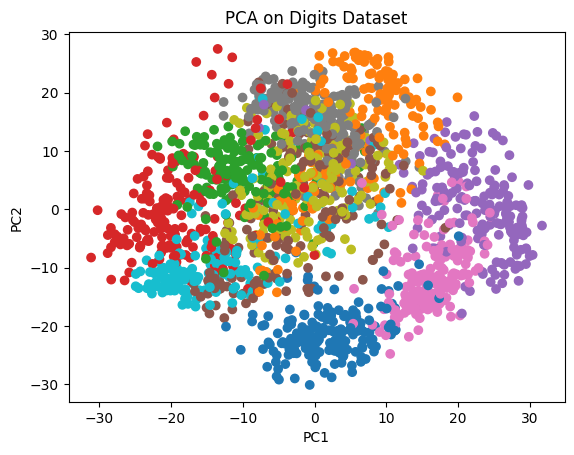

explained variance ratio shape: (64,)
First 5 ratios: [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155]
Min #components for >=95% variance: 40


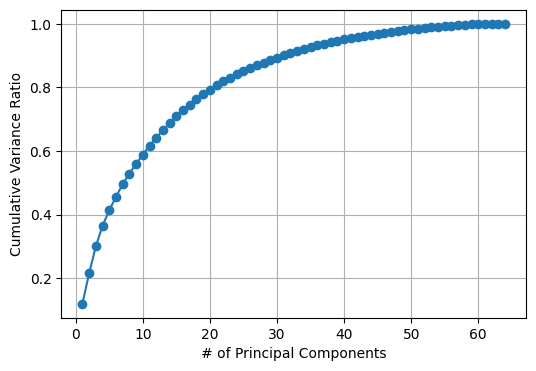

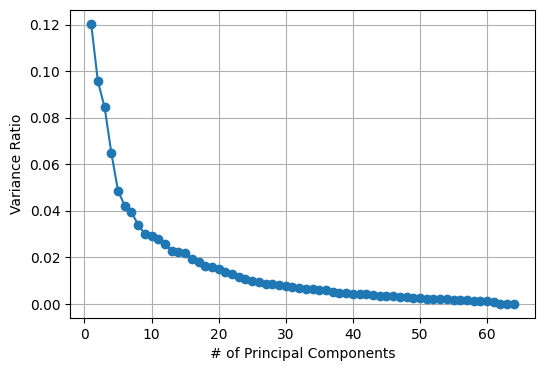

In [ ]:
#PCA excels at compressing particle trajectories and images by finding collective behavior patters, similar to eigenmoeds in physical systems

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


#Charge data
digits = load_digits() #8×8 grayscale images of handwritten digits.
X = digits.data #1797 samples, each flattened into 64 pixel-intensity features.
y = digits.target
print("X Shape: ",X.shape, "Y shape: ", y.shape)



#Plot 2D scatter
pca = PCA(n_components=2) #first two principal components (directions of maximal variance)
X_pca = pca.fit_transform(X) #Each row is the coordinate of an image along PC1 and PC2.
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap="tab10") #coordinate of each sample along the first and second principal component
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Digits Dataset")
plt.show()

#explained variance ratio and the cumulative  explained variance

#Standarize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#Fit PCA with all components
pca_full = PCA(n_components=64, random_state=42)
pca_full.fit(X_std)

# Fraction of the total dataset variance explained by each principal component
rat = pca_full.explained_variance_ratio_
print("explained variance ratio shape:", rat.shape)
print("First 5 ratios:", rat[:5])

#Cumulative ratio
cu_rat = np.cumsum(rat)
k95 = int(np.searchsorted(cu_rat, 0.95)+1)
print("Min #components for >=95% variance:", k95)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(rat)+1), cu_rat, marker='o')
plt.xlabel("# of Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid()
plt.show()
print("\n")
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(rat)+1), rat, marker='o')
plt.xlabel("# of Principal Components")
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()



#This example reduces 64-dimensional digit images to just 2 dimensions while preservnig class structure

X-axis = coordinate of each sample along the first principal component (PC1).

Y-axis = coordinate of each sample along the second principal component (PC2).

So each dot = one digit image, represented in a 2D coordinate system defined by PC1 and PC2.

Each principal component is a linear combination of the original features (pixels).

$PC1=w1,1​⋅pixel1​+w1,2​⋅pixel2​+⋯+w1,64​⋅pixel64​$


The weights are the entries of the eigenvector for PC1.

They tell you how much each pixel contributes to the component.

**Interpretation:**

Moving right along PC1 in the scatter plot means “your digit image looks more like the PC1 pattern.”

Moving left means “less like it / more like the opposite of the PC1 pattern.”

Same logic for PC2.


#SVD: The universal factorization
Singular Value Decomposition provides a general matrix factorization that works beyod the constrains of PCA:

$X=U\Sigma V^T$

SVD is closely related to PCA when applied to center data, but offers greater flexibility for any rectangular matrix. In physics, it's invaluable for image compression an solving ill-posed inverse problems.

Dimension of the original image: 
(height, width, colors (RGB)) = (427, 640, 3)

 (427, 427) (427,) (427, 640) 

Dimension of the compressed image: 
(height, width, colors (RGB)) = (427, 640) 

The image is reduce to  40 principal components. 



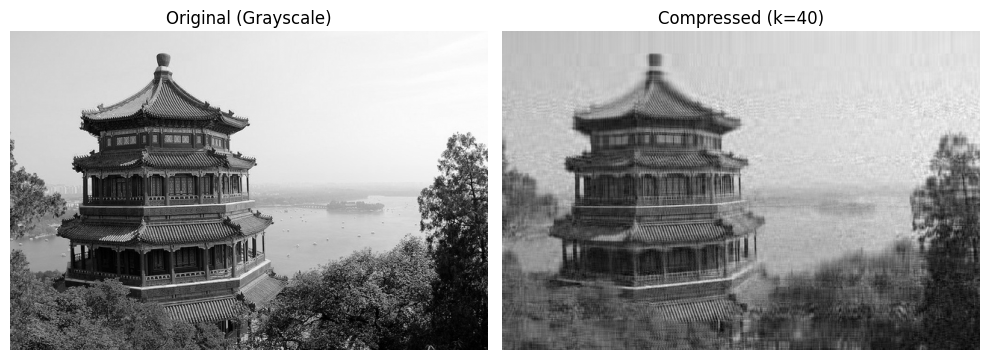

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

image = load_sample_image("china.jpg") #Return color image as a Numpy Array
print("Dimension of the original image: \n(height, width, colors (RGB)) =", image.shape)
gray = np.mean(image,axis=2) #axis=2 take the mean across the lst dimension (3 color channels), for each pizel in (i ,j) you have 3 values (R,G,B), the mean result in gray [i,j] because it ignores color differences
gray = gray / 255.0 #Rescales the pixels [black=0,white=255] into range [0,1]
U,S,Vt=np.linalg.svd(gray, full_matrices=False) #Applies SVD, and U,S, Vt are building blocks to reconstruct the image
print("\n", U.shape,S.shape,Vt.shape, "\n")
k = 40 #keep top-k components
compressed = U[:, :k] @ np.diag(S[:k]) @ Vt[:k,:] #Multiply the blocks back to approximate the original image
print("Dimension of the compressed image: \n(height, width, colors (RGB)) =", compressed.shape, "\n")
print("The image is reduce to ", k, "principal components. \n" )

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#Original gray-scale image
axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Original (Grayscale)")
axes[0].axis("off")
#Compressed image
axes[1].imshow(compressed, cmap="gray")
axes[1].set_title(f"Compressed (k={k})")
axes[1].axis("off")

plt.tight_layout()
plt.show()


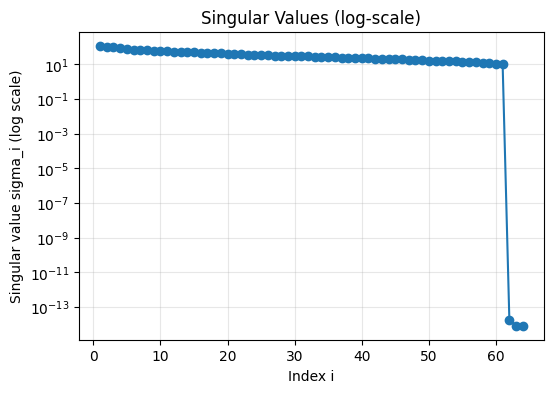

Min k for E(k) ≥ 0.95 (SVD energy): 40


/tmp/ipython-input-4023556211.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


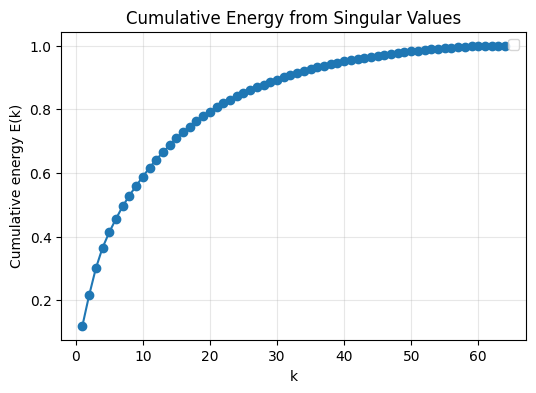

First 5 λ (from PCA):       [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452 ]
First 5 σ^2/(n-1) (from SVD): [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452 ]
All close?  True


In [ ]:
import numpy as np

n, d = X_std.shape #dimensions
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)  # compact SVD

plt.figure(figsize=(6,4))
plt.semilogy(np.arange(1, len(S)+1), S, marker='o')  # semilogy = eje Y log
plt.xlabel("Index i")
plt.ylabel("Singular value sigma_i (log scale)")
plt.title("Singular Values (log-scale)")
plt.grid(alpha=0.3)
plt.show()

# Cumulative energy from singular values

sigma2 = S**2
E = np.cumsum(sigma2) / np.sum(sigma2)
k95_svd = int(np.searchsorted(E, 0.95) + 1)  # +1 por índice base 0
print("Min k for E(k) ≥ 0.95 (SVD energy):", k95_svd)

# Plot cumulative energy
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(E)+1), E, marker='o')
plt.xlabel("k")
plt.ylabel("Cumulative energy E(k)")
plt.title("Cumulative Energy from Singular Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#Verify: PCA eigenvalues are proportional to (\sigma_i^2/(n-1)).
pca_full = PCA(n_components=d, random_state=42)
pca_full.fit(X_std)

lam = pca_full.explained_variance_            # eigenvalues (λ_i)
lam_from_svd = (S**2) / (n - 1)               # should match up to num. precision

print("First 5 λ (from PCA):      ", lam[:5])
print("First 5 σ^2/(n-1) (from SVD):", lam_from_svd[:5])

# Check numerical closeness
print("All close? ", np.allclose(lam, lam_from_svd, rtol=1e-5, atol=1e-8))



#Beyond Linearity

PCA and SVD excel at capturing lineaer relationships, but many physics datasets exit on complex nonlinear manifolds that requires more sophisticated approaches.

##t-SNE: Preserving Local Neighborhoods

t-distributed Stochastic Neighbor Embedding focuses on preserving local neighborhood relationships through probability-based optimization.

**How t-SNE**


*   Converts distances to probabilities
*   Similar points get high probability
*   Minimizes Kullback-Leiber (KL) divergence between high and low dimensions
* Excelent fot 2D/3D visualization



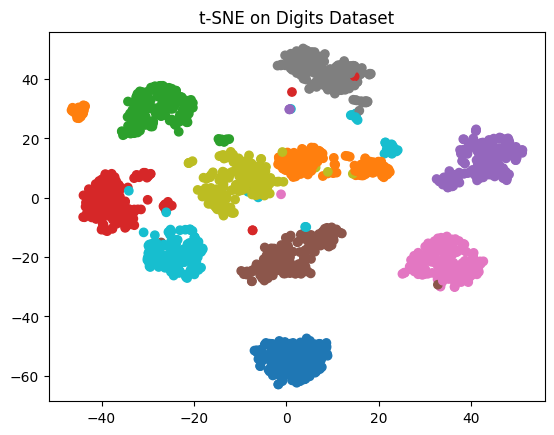

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) #Project the data to 2D, set the random seed (reproducible results)
X_tsne = tsne.fit_transform(X) #It fit the original datasets (1797,64) to find the 2D cordinates that minimize the KL divergence, obtaining for each digit image, 2 coordinates (embedding)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
c=digits.target, cmap="tab10") #Colors each point acording to its digit label
plt.title("t-SNE on Digits Dataset")
plt.show()



*   Each cluster corresponds roughly to one digit (0, 1, 2, …, 9).
*   Digits that look similar (e.g., 4 and 9, 1 and 7) may overlap more.
*  Distances within a cluster are meaningful (neighbors in high-D stay neighbors in 2D).
*  Distances between clusters are not globally meaningful — t-SNE only guarantees local preservation.



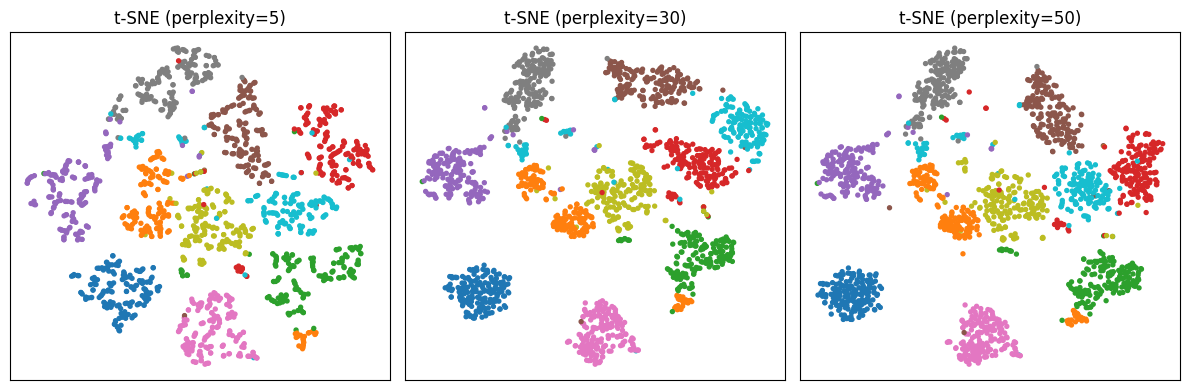

In [ ]:
#Perplexities and subplots
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, p in zip(axes, perplexities):
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X_std)
    sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", s=8)
    ax.set_title(f"t-SNE (perplexity={p})")
    ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()


#UMAP: The best of both worlds
Uniform Mainfold Approximation and Projection offers similar goals to t-SNE butt with significant improvements in both local and global structure preservation.


* **Balanced Approach:** Preserves both local neighborhoods and global
structure, providing more interpretable
embeddings than t-SNE.
* **Computational Efficiency:** Significantly faster and more scalable than t-
SNE, making it suitable for larger datasets.
* **Mathematical Foundation:** Based on Riemannian geometry and
topological graph theory, providing solid
theoretical grounding.



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


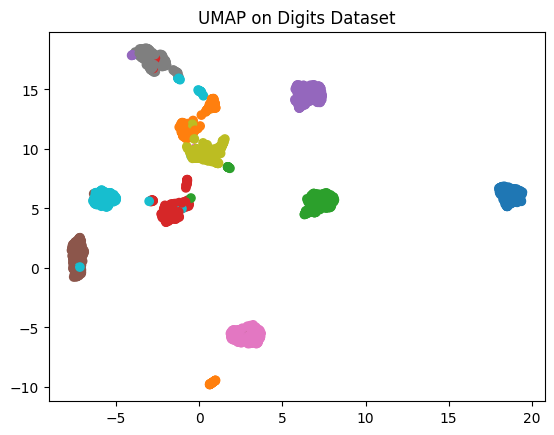

In [ ]:
import umap
umap_model = umap.UMAP(n_components=2, random_state=42) #Project to 2D space for visualization
X_umap = umap_model.fit_transform(X) # It fits the datasets (1797 samples, 64 each) to a 2D 1797 samples. It builds a k-NN graph in the original 64D space and finds 2D coordinates that preserve that fuzzy neighbour structure
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=digits.target, cmap="tab10")
plt.title("UMAP on Digits Dataset")
plt.show()

* **Clusters form naturally:** digits of the same type (e.g. all 0s, 1s, etc.) appear grouped together.

* **Relative placement:** unlike t-SNE, the distances between clusters are somewhat interpretable (e.g., clusters of 4 and 9 might be closer, reflecting visual similarity).

* **Global structure preserved better** than t-SNE: cluster spacing is more consistent, not purely arbitrary.

**Note:** t-SNE and UMAP are sensitive to hyperparameter choices and produce different results on each run, requiring careful validation and
multiple runs for robust analysis.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


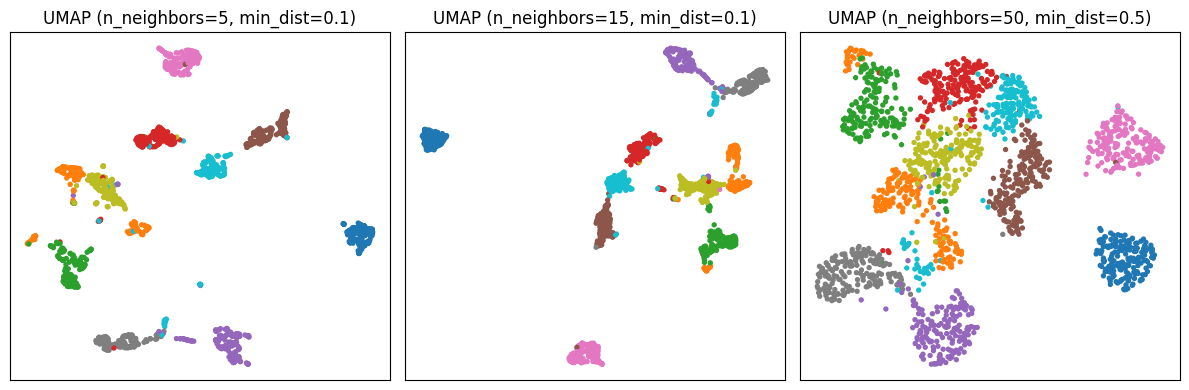

In [ ]:
param_pairs = [(5, 0.1), (15, 0.1), (50, 0.5)]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, (nn, md) in zip(axes, param_pairs):
    umap_model = umap.UMAP(n_components=2, n_neighbors=nn, min_dist=md, random_state=42)
    X_umap = umap_model.fit_transform(X_std)
    ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="tab10", s=8)
    ax.set_title(f"UMAP (n_neighbors={nn}, min_dist={md})")
    ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()


#Autoencoders: Neural Network approach

Autoencoders represent a fundamentally different approach to dimensionality reduction using neural networks trained to reconstruct their input.

1. **Encoder:** Compresses input data into a lowerdimensional
latent representation.
2. **Latent Space:** Learned nonlinear reduced representation
capturing essential features.
3. **Decoder:** Reconstructs original data from the
compressed latent representation.

##Building an Autoencoder:
Here's how to implement an autoencoder for the digits dataset, creating a 2-dimensional latent
space representation:


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


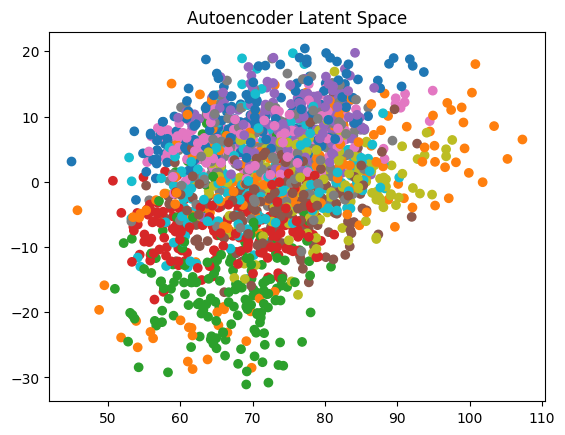

In [ ]:
from tensorflow.keras import layers, models
input_dim = X.shape[1] #Number of features=64 dimensions (pixel of digital images)
#Encoder: Compresses space 64D -> 2D
encoder = models.Sequential([
layers.Input(shape=(input_dim,)), #64
layers.Dense(64, activation="relu"), #ReLU activation for nonlinearity
layers.Dense(2) # latent space
])
#Decoder: Expand the space from 2D latent space to the 64 orignial size space
decoder = models.Sequential([
layers.Input(shape=(2,)), #2D latent vector
layers.Dense(64, activation="relu"), #Dense hidden layer with 64 neurons, ReLU
layers.Dense(input_dim, activation="sigmoid")
])
autoencoder = models.Sequential([encoder, decoder]) #Combine encoder+decoder
autoencoder.compile(optimizer="adam", loss="mse") #Optimizer: Adam, loss: mean squad error (difference between original and reconstructed)
autoencoder.fit(X, X, epochs=20, batch_size=256, verbose=0) #Train the autencoder, process 256 samples at a time, verbose=0: supresses training logs
X_latent = encoder.predict(X) #Pass data trough the encoder only to plot it
plt.scatter(X_latent[:, 0], X_latent[:, 1], c=digits.target, cmap="tab10")
plt.title("Autoencoder Latent Space")
plt.show()

In [ ]:
from tensorflow.keras import layers, models
input_dim = X.shape[1] #Number of features=64 dimensions (pixel of digital images)
#Encoder: Compresses space 64D -> 2D
encoder = models.Sequential([
layers.Input(shape=(input_dim,)), #64
layers.Dense(64, activation="relu"), #ReLU activation for nonlinearity
layers.Dense(32, activation="relu"),
layers.Dense(2) # latent space
])
#Decoder: Expand the space from 2D latent space to the 64 orignial size space
decoder = models.Sequential([
layers.Input(shape=(2,)), #2D latent vector
layers.Dense(32, activation="relu"), #Dense hidden layer with 64 neurons, ReLU
layers.Dense(64, activation="relu"), #Dense hidden layer with 64 neurons, ReLU
layers.Dense(input_dim, activation="sigmoid")
])
autoencoder = models.Sequential([encoder, decoder]) #Combine encoder+decoder
autoencoder.compile(optimizer="adam", loss="mse") #Optimizer: Adam, loss: mean squad error (difference between original and reconstructed)
autoencoder.fit(X, X, epochs=20, batch_size=256, verbose=0) #Train the autencoder, process 256 samples at a time, verbose=0: supresses training logs
X_latent = encoder.predict(X) #Pass data trough the encoder only to plot it
plt.scatter(X_latent[:, 0], X_latent[:, 1], c=digits.target, cmap="tab10")
plt.title("Autoencoder Latent Space")
plt.show()